## Group 55 - Assignment 3 - Problem 3

<div class="alert alert-block alert-info">
<b>Note:</b>This same notebook serves as our report. Suitable comments and explanations with visualizations were prodcued where and when needed. A pdf is also provided along with this notebook.
</div>


### Sentiment Analysis
***

In [ ]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import glob2
import nltk
import warnings
warnings.filterwarnings('ignore') 
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM,Embedding, SpatialDropout1D, Flatten, Dropout,SimpleRNN
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from IPython.display import Image

We are using Golb2 library for reading all the files present in train and test folders. This library has the ability to capture the text matched by glob patterns, and return those matches alongside the filenames.

In [2]:
#Reading all the positive review files present in the train data folder

read_pos_files=glob2.glob(r'C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\train\pos\*.txt')

#Writing all the positive reviews present in the train data folder to the file result_pos.txt with delimiter as "\n"

with open(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\train\result_pos.txt", "w",encoding="utf8") as outfile:
    for f in read_pos_files:
        with open(f, "r",encoding="utf8") as infile:
            outfile.write(infile.read()+"\n")

In [3]:
#Reading all the negative review files present in the train data folder

read_neg_files=glob2.glob(r'C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\train\neg\*.txt')

#Writing all the negative reviews present in the train data folder to the file result_neg.txt with delimiter as "\n"

with open(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\train\result_neg.txt", "w",encoding="utf8") as outfile:
    for f in read_neg_files:
        with open(f, "r",encoding="utf8") as infile:
            outfile.write(infile.read()+"\n")

In [4]:
#Reading all the delimted positive reviews present in the file result_pos.txt as a dataframe

x_pos=pd.read_csv(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\train\result_pos.txt",header=None,sep='\n')

#Converting the dataframe to a list

x_pos_list = x_pos[0].tolist()

#Reading all the delimted negative reviews present in the file result_neg.txt as a dataframe

x_neg=pd.read_csv(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\train\result_neg.txt",header=None,sep='\n')

#Converting the dataframe to a list
x_neg_list = x_neg[0].tolist()

In [5]:
#Validating the number of positive and negative reviews

len(x_pos_list),len(x_neg_list)

(12500, 12500)

## Data Preprocessing on Train Data

Below are the preprocessing steps performed on the data:

1. Converting the text to lower case, removing new lines within a sentence, alphanumeric words, text in <>, http links, characters that are not alphabets, extra spaces.
2. Normalized the words in the corpus by trying to convert all of the different forms of a given word into one. We have performed Lemmatization instead of stemming since stemming just removes the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form.
3. Removed the stop words.

In [6]:
x_pos_list1=[]
for i in range(len(x_pos_list)):
    x_pos_list[i] = x_pos_list[i].lower() 
    text = re.sub('\n', ' ', x_pos_list[i])
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^abcdefghijklmnopqrstuvwxyz\s]', '',text)
    text = re.sub(r'\s+',' ',text)
    x_pos_list1.append(text)
    
lemmatizer = WordNetLemmatizer()
for i in range(len(x_pos_list1)):
    words = nltk.word_tokenize(x_pos_list1[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x_pos_list1[i] = ' '.join(words)  
    
x_neg_list1=[]
for i in range(len(x_neg_list)):
    x_neg_list[i] = x_neg_list[i].lower() 
    text = re.sub('\n', ' ', x_neg_list[i])
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^abcdefghijklmnopqrstuvwxyz\s]', '',text)
    text = re.sub(r'\s+',' ',text)
    x_neg_list1.append(text)
    
lemmatizer = WordNetLemmatizer()
for i in range(len(x_neg_list1)):
    words = nltk.word_tokenize(x_neg_list1[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x_neg_list1[i] = ' '.join(words) 

In [9]:
x_train_list = x_pos_list1+x_neg_list1
len(x_train_list)

25000

In [10]:
#Reading all the positive review files present in the test data folder

read_pos_files=glob2.glob(r'C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\test\pos\*.txt')

#Writing all the positive reviews present in the test data folder to the file result_pos.txt with delimiter as "\n"

with open(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\test\result_pos.txt", "w",encoding="utf8") as outfile:
    for f in read_pos_files:
        with open(f, "r",encoding="utf8") as infile:
            outfile.write(infile.read()+"\n")

In [11]:
#Reading all the negative review files present in the test data folder

read_neg_files=glob2.glob(r'C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\test\neg\*.txt')

#Writing all the negative reviews present in the test data folder to the file result_neg.txt with delimiter as "\n"

with open(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\test\result_neg.txt", "w",encoding="utf8") as outfile:
    for f in read_neg_files:
        with open(f, "r",encoding="utf8") as infile:
            outfile.write(infile.read()+"\n")

In [12]:
#Reading all the delimted positive reviews present in the file result_pos.txt as a dataframe

x_pos=pd.read_csv(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\test\result_pos.txt",header=None,sep='\n')

#Converting the dataframe to a list

x_pos_list = x_pos[0].tolist()
#x_pos_list=x_pos_list[0:200]

#Reading all the delimted negative reviews present in the file result_neg.txt as a dataframe

x_neg=pd.read_csv(r"C:\Users\Sai Anurag\Documents\657\Assignment 3\data\aclImdb\test\result_neg.txt",header=None,sep='\n')

#Converting the dataframe to a list
x_neg_list = x_neg[0].tolist()
#x_neg_list=x_neg_list[0:200]

#Validating the number of positive and negative reviews

len(x_pos_list),len(x_neg_list)

(12500, 12500)

## Data Preprocessing on Test Data

In [13]:
x_pos_list1=[]
for i in range(len(x_pos_list)):
    x_pos_list[i] = x_pos_list[i].lower() 
    text = re.sub('\n', ' ', x_pos_list[i])
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^abcdefghijklmnopqrstuvwxyz\s]', '',text)
    text = re.sub(r'\s+',' ',text)
    x_pos_list1.append(text)
    
lemmatizer = WordNetLemmatizer()
for i in range(len(x_pos_list1)):
    words = nltk.word_tokenize(x_pos_list1[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x_pos_list1[i] = ' '.join(words)  
    
x_neg_list1=[]
for i in range(len(x_neg_list)):
    x_neg_list[i] = x_neg_list[i].lower() 
    text = re.sub('\n', ' ', x_neg_list[i])
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^abcdefghijklmnopqrstuvwxyz\s]', '',text)
    text = re.sub(r'\s+',' ',text)
    x_neg_list1.append(text)
    
lemmatizer = WordNetLemmatizer()
for i in range(len(x_neg_list1)):
    words = nltk.word_tokenize(x_neg_list1[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x_neg_list1[i] = ' '.join(words) 

In [14]:
x_test_list = x_pos_list1+x_neg_list1
len(x_test_list)

25000

### Using CounterVectorizer and Logistic Regression

In order for the data to be understandable by our algorithm, we will need to convert each review to a numeric representation called vectorization. We are using CountVectorizer to convert the collection of review to a numeric representation.

**CountVectorizer** is a tool provided by the scikit-learn library in Python. It is used to alter a given text into a vector based on the count of each word that occurs in the complete text.

In [15]:
#Using CountVectorizer to convert the words to numeric representation

vectorizer = CountVectorizer(binary=True) #binary=True means all non zero counts are set to 1. 
vectorizer.fit(x_train_list)
x = vectorizer.transform(x_train_list)

#Creating the target coulmn i.e 1 for all the positive reviews and 0 for negative reviews

target = [0 if j > 12500 else 1 for j in range(25000)]

We are creating a **Logistic Regression** model to classify the positive and negative reviews. Logistic regression is easy to interpret, it performs well on sparse datasets ald also the model learns very fast compared to other algorithms.

In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success) or 0 (no, failure). It has hyperparameter C, which adjusts the regularization.

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, target, test_size = 0.2)
c_values = [0.01, 0.05, 0.25, 0.5, 1]
accuracy=[]
for i in c_values:
    model1 = LogisticRegression(C=i)
    model1.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_val, model1.predict(x_val)))
    
d = {'Hyperparameter C':c_values,'Accuracy':accuracy}
df_acc = pd.DataFrame(d)
df_acc

,Hyperparameter C,Accuracy
0,0.01,0.8678
1,0.05,0.8752
2,0.25,0.8730
3,0.50,0.8724
4,1.00,0.8710


Using CountVectorizer, the value of C that gives us the highest accuracy of 87.30% is 0.05 

In [17]:
x_test = vectorizer.transform(x_test_list)
final_model1 = LogisticRegression(C=0.05)
final_model1.fit(x, target)
a = round(accuracy_score(target, final_model1.predict(x_test)),4)
print("Accuracy on Test Data: {}".format(a))

Accuracy on Test Data: 0.8762


From the above, we see that on the test data, the Logistic Regression model using CountVectorizer gave an accuracy of 87.61%

### Using TfidfVectorizer and Logistic Regression

Another usual way to represent each document in a corpus is by using the **term frequency-inverse document frequency** for each word.The tf-idf aims to represent the number of times a given word appears in a document relative to the number of documents in the corpus that the word appears in. The words that appear in many documents have a less value and words that appear in less documents have high values.

In [18]:
#Using TfidfVectorizer to convert the words to numeric representation

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train_list)
x = vectorizer.transform(x_train_list)

#Creating the target coulmn i.e 1 for all the positive reviews and 0 for negative reviews

target = [0 if j > 12500 else 1 for j in range(25000)]

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, target, test_size = 0.2)
c_values = [0.01, 0.05, 0.25, 0.5, 1]
accuracy=[]
for i in c_values:
    model1 = LogisticRegression(C=i)
    model1.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_val, model1.predict(x_val)))
    
d = {'Hyperparameter C':c_values,'Accuracy':accuracy}
df_acc = pd.DataFrame(d)
df_acc

,Hyperparameter C,Accuracy
0,0.01,0.8214
1,0.05,0.8456
2,0.25,0.8700
3,0.50,0.8796
4,1.00,0.8848


Using TfidfVectorizer, the value of C that gives us the highest accuracy of 88.74% is 1 

In [20]:
x_test = vectorizer.transform(x_test_list)
final_model2 = LogisticRegression(C=1)
final_model2.fit(x, target)
a = round(accuracy_score(target, final_model2.predict(x_test)),4)
print("Accuracy on Test Data: {}".format(a))

Accuracy on Test Data: 0.8782


From the above, we see that on the test data, the Logistic Regression model using TfidfVectorizer gave an accuracy of 87.81%

### Using TfidfVectorizer and Linear Support Vector Machines

The linear classifiers tend to work well on very sparse datasets like the one we have. Support Vector Machines is another algorithm that can produce great results with a less training time.

**Support Vector Machine(SVM)** is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The algorithm has a simple idea of creating a line or a hyperplane which separates the data into classes.
The Linear SVM also, has hyperparameter C, which adjusts the regularization.

In [21]:
from sklearn.svm import LinearSVC

x_train, x_val, y_train, y_val = train_test_split(x, target, test_size = 0.2)
c_values = [0.01, 0.05, 0.25, 0.5, 1]
accuracy=[]
for i in c_values:
    model1 = LinearSVC(C=i)
    model1.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_val, model1.predict(x_val)))
    
d = {'Hyperparameter C':c_values,'Accuracy':accuracy}
df_acc = pd.DataFrame(d)
df_acc

,Hyperparameter C,Accuracy
0,0.01,0.8530
1,0.05,0.8780
2,0.25,0.8920
3,0.50,0.8924
4,1.00,0.8896


Using SVM, the value of C that gives us the highest accuracy of 88.86% is 0.50

In [22]:
x_test = vectorizer.transform(x_test_list)
final_model = LinearSVC(C=0.50)
final_model.fit(x, target)
a = round(accuracy_score(target, final_model.predict(x_test)),4)
print("Accuracy on Test Data: {}".format(a))

Accuracy on Test Data: 0.8741


From the above, we see that on the test data, the Linear SVM model using TfidfVectorizer gave an accuracy of 87.41%

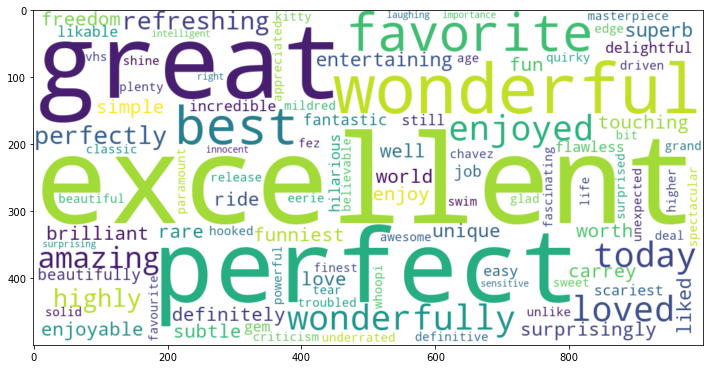

In [23]:
word_coef = {review: coefficient for review, coefficient in zip(vectorizer.get_feature_names(), model1.coef_[0])}

#Creating a word cloud for top most discriminating words for positive reviews.

top_pos_list=[]
for top_positive in sorted(word_coef.items(), key=lambda x: x[1], reverse=True)[:150]:
    top_pos_list.append(top_positive[0])
    
top_pos_list1=' '.join(top_pos_list[:100])

plt.figure(figsize=(12,10))
positive_text=top_pos_list1
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5,background_color='white')
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show;

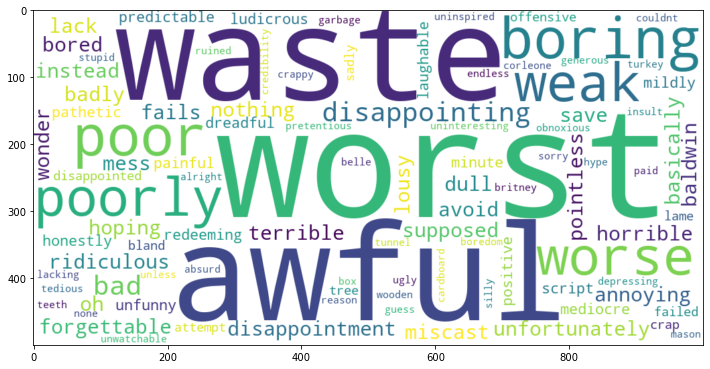

In [24]:
#Creating a word cloud for top most discriminating words for negative reviews.

top_neg_list=[]
for top_negative in sorted(word_coef.items(), key=lambda x: x[1])[:150]:
    top_neg_list.append(top_negative[0])
    
top_neg_list1=' '.join(top_neg_list[:100])

plt.figure(figsize=(12,10))
positive_text=top_neg_list1
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5,background_color='white')
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show;

### LSTM Implementation

A Recurrent Neural Network has exploding gradient problem when the network layers that have values larger than 1 or vanishing problem if the values are less than 1. To overcome this problem of RNN, Long Short Term Memory is used.

We have used tokenizer to vectorize the text and convert it into sequence of integers. It uses top most common 2000 words

pad_sequences is used to convert the sequences into 2-D numpy array.

In [25]:
data = pd.DataFrame(x_train_list, columns=['review',])
tokenizer = Tokenizer(num_words=2000, split=' ') 
tokenizer.fit_on_texts(data['review'].values)
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X, maxlen=250)

Y_train = [1 if j < 12500 else 0 for j in range(25000)]
Y_train = np.array(Y_train)

Y_test = [1 if j < 12500 else 0 for j in range(25000)]
Y_test = np.array(Y_test)

#Preparing the test dataset for the model.

data_test = pd.DataFrame(x_test_list, columns=['review',])
tokenizer = Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(data_test['review'].values)
X_test = tokenizer.texts_to_sequences(data_test['review'].values)
X_test = pad_sequences(X_test,maxlen=250)

https://www.kaggle.com/vincentman0403/sentimental-analysis-on-imdb-by-lstm

In [26]:
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=32, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 32)           64000     
_________________________________________________________________
dropout (Dropout)            (None, 250, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 169,425
Trainable params: 169,425
Non-trainable params: 0
__________________________________________________

In [27]:
train_history = model.fit(X, Y_train, batch_size=64,epochs=3, verbose=True,validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 51s 157ms/step - loss: 0.5217 - accuracy: 0.7289 - val_loss: 0.5130 - val_accuracy: 0.7580
Epoch 2/3
313/313 [==============================] - 48s 152ms/step - loss: 0.2915 - accuracy: 0.8841 - val_loss: 0.2917 - val_accuracy: 0.8940
Epoch 3/3
313/313 [==============================] - 50s 161ms/step - loss: 0.2672 - accuracy: 0.8925 - val_loss: 0.5031 - val_accuracy: 0.7884


In [28]:
acc = model.evaluate(X_test, Y_test, verbose = True, batch_size = 64)
print("Accuracy on Test Data: {}".format(round(acc[1],4)))

391/391 [==============================] - 14s 36ms/step - loss: 0.9207 - accuracy: 0.5620
Accuracy on Test Data: 0.562


https://www.youtube.com/watch?v=oMDbQcvkmjQ

In [29]:
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=32, input_length=X.shape[1]))
model.add(SimpleRNN(100, return_sequences='true'))
model.add(SimpleRNN(50, return_sequences='true'))
model.add(SimpleRNN(25))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 32)           64000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 250, 100)          13300     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 250, 50)           7550      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 25)                1900      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 86,776
Trainable params: 86,776
Non-trainable params: 0
_________________________________________________________________


In [30]:
train_history = model.fit(X, Y_train, batch_size=64,epochs=3, verbose=True,validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 32s 96ms/step - loss: 0.6799 - accuracy: 0.5988 - val_loss: 0.8671 - val_accuracy: 0.0134
Epoch 2/3
313/313 [==============================] - 34s 108ms/step - loss: 0.6590 - accuracy: 0.6289 - val_loss: 1.0251 - val_accuracy: 0.0722
Epoch 3/3
313/313 [==============================] - 33s 104ms/step - loss: 0.5838 - accuracy: 0.6948 - val_loss: 1.4376 - val_accuracy: 0.3448


In [31]:
acc = model.evaluate(X_test, Y_test, verbose = True, batch_size = 64)
print("Accuracy on Test Data: {}".format(round(acc[1],4)))

391/391 [==============================] - 12s 31ms/step - loss: 1.1812 - accuracy: 0.5108
Accuracy on Test Data: 0.5108


https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [32]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [33]:
model = Sequential()
model.add(Embedding(2000, 32, input_length=X.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 32)           64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 250, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 125, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               51712     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [34]:
train_history = model.fit(X, Y_train, batch_size=64,epochs=3, verbose=True,validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 28s 84ms/step - loss: 0.5300 - accuracy: 0.7252 - val_loss: 0.3292 - val_accuracy: 0.8666
Epoch 2/3
313/313 [==============================] - 26s 84ms/step - loss: 0.2779 - accuracy: 0.8881 - val_loss: 0.3713 - val_accuracy: 0.8386
Epoch 3/3
313/313 [==============================] - 27s 87ms/step - loss: 0.2308 - accuracy: 0.9109 - val_loss: 0.4309 - val_accuracy: 0.8132


In [35]:
print("Final Training Accuracy: {}".format(round(train_history.history['accuracy'][2],3)))

Final Training Accuracy: 0.901


In [37]:
acc = model.evaluate(X_test, Y_test, verbose = True, batch_size = 64)
print("Accuracy on Test Data: {}".format(round(acc[1],4)))

391/391 [==============================] - 8s 21ms/step - loss: 0.9726 - accuracy: 0.5604
Accuracy on Test Data: 0.5604


### LSTM Model Architecture

In [ ]:
Image("lstm.PNG",width=500,height=400)

* The embedding layer encodes the input sequence into a sequence of dense vectors of dimension mentioned.
* Dropout - This is a regularization method where input and recurrent connections to LSTM units are probabilistically excluded from activation and weight updates while training a network. This has the effect of reducing overfitting and improving model performance. Dropout rate of 0.2 has been used.
* We considered 32 LSTM units for the model
* Relu - Rectified linear unit function will output the input if it is positive, otherwise it will output zero. This overcomes the vanishing gradient problem, allowing models to learn faster and perform better.
* Sigmoid - This function limits the output to a range between 0 and 1.
* We are using "Adam" optimizer.

* Loss as 'binary_crossentropy' is used as we have only two label classes.

The blog https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47 clearly explains the working of LSTM algorithm and this has been referred to better understand the concept and to implement the algorithm.